Data Dictionary:

- **State**: The state where the customer resides.
- **Account length**: The number of days the customer has been with the company.
- **Area code**: The area code associated with the customer's phone number.
- **International plan**: Whether the customer has an international calling plan (Yes/No).
- **Voice mail plan**: Whether the customer has a voicemail plan (Yes/No).
- **Number vmail messages**: The number of voicemail messages received by the customer.
- **Total day minutes**: The total number of minutes the customer used during the day.
- **Total day calls**: The total number of calls made by the customer during the day.
- **Total day charge**: The total charge for daytime usage.
- **Total eve minutes**: The total number of minutes the customer used during the evening.
- **Total eve calls**: The total number of calls made by the customer during the evening.
- **Total eve charge**: The total charge for evening usage.
- **Total night minutes**: The total number of minutes the customer used during the night.
- **Total night calls**: The total number of calls made by the customer during the night.
- **Total night charge**: The total charge for nighttime usage.
- **Total intl minutes**: The total number of international minutes used by the customer.
- **Total intl calls**: The total number of international calls made by the customer.
- **Total intl charge**: The total charge for international usage.
- **Customer service calls**: The number of customer service calls made by the customer.
- **Churn**: Whether the customer churned (i.e., canceled the service) (True/False).



**Problem Statement** : Finding out the likelihood of customer churn based on features about customers will help major cell phone companies save money on adverstisement.

**Data Science Problem**: We need to find the key features that are influencing customer churn and test how accurate the prediction is based on these features.

# Upload / Clean Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# Importing necessary libraries for linear regression analysis
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
df = pd.read_csv('churn-bigml-20.csv')

In [3]:
df.shape

(667, 20)

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [6]:
df['Churn'].value_counts()

Churn
False    572
True      95
Name: count, dtype: int64

This class is imbalanced. The accuracy of the model will not be as strong because of this. Use SMOTE: Synthetic minority over sampling technique. (Check documentation on scikit)

In [7]:
df['Churn'] = df['Churn'].astype(int)

# EDA

## Descriptive Statistics

In [8]:
num_col = df.select_dtypes(include=['int64', 'float64'])
cat_col = df.select_dtypes(include=['category'])

num_df = df[num_col.columns]
cat_df = df[cat_col.columns]

In [9]:
num_col.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718,0.142429
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357,0.349752
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000,0.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000,0.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000,0.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000,1.000000


In [56]:
# Calculate the total number of churned customers
total_churned = df['Churn'].sum()

# Calculate the total number of customers
total_customers = len(df)

# Calculate the churn rate
churn_rate = total_churned / total_customers

print("Overall Churn Rate:", churn_rate)

Overall Churn Rate: 0.1424287856071964


## Numerical Features

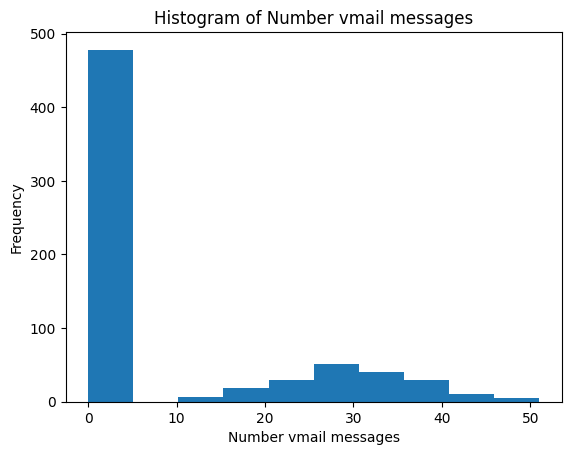

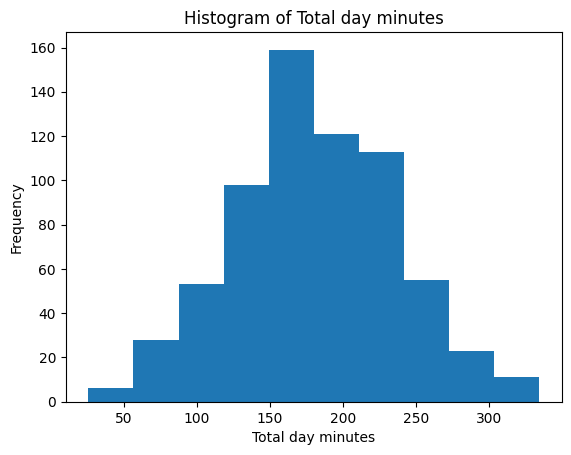

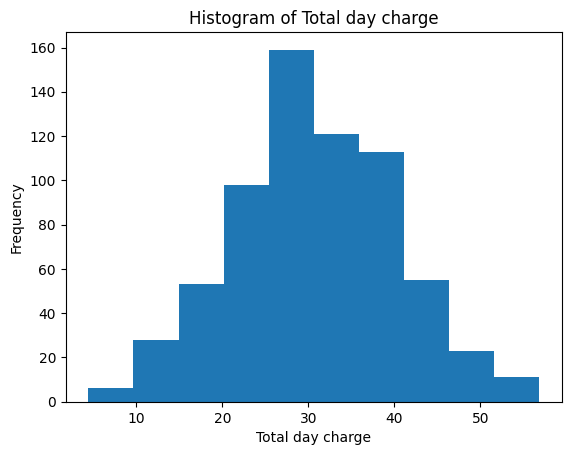

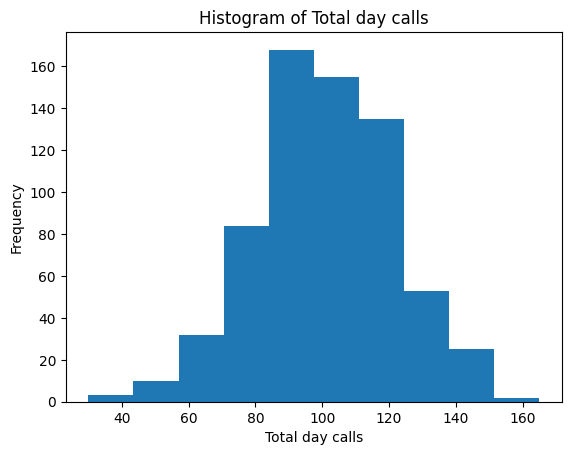

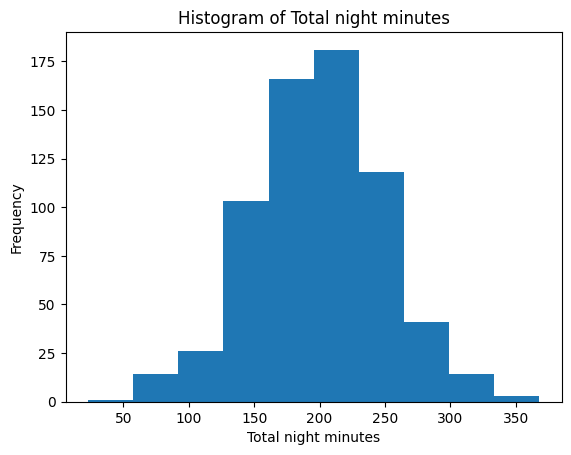

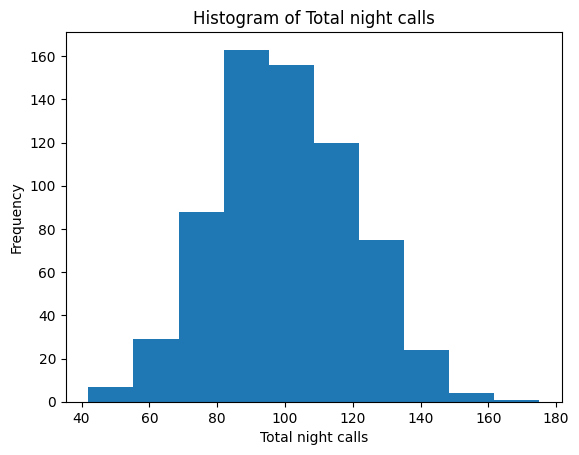

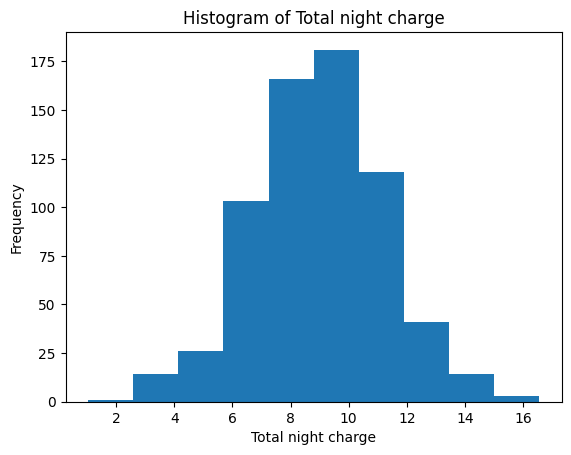

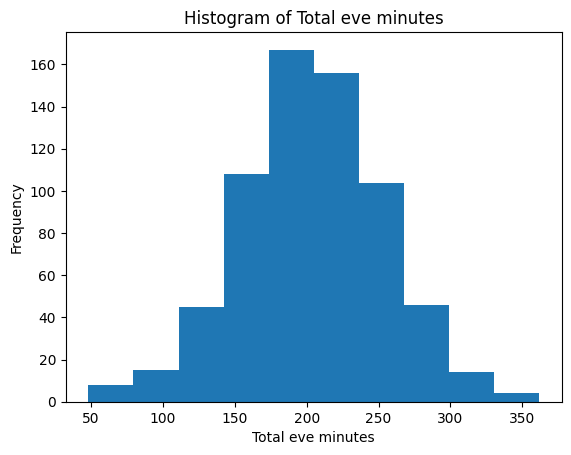

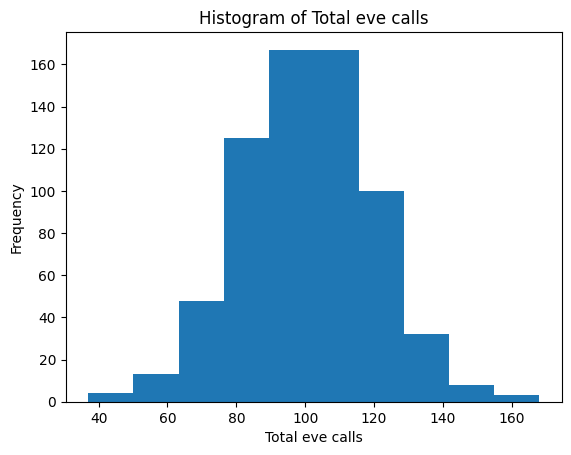

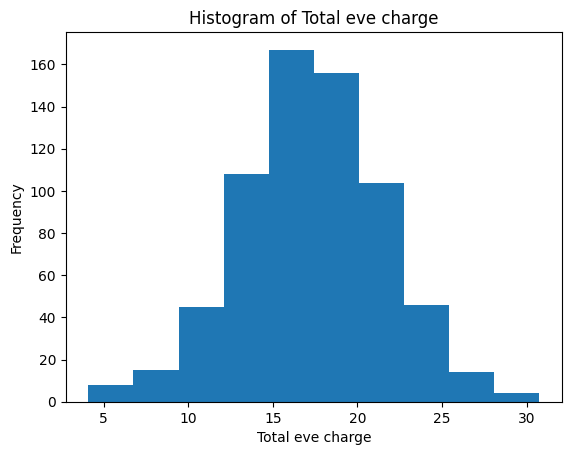

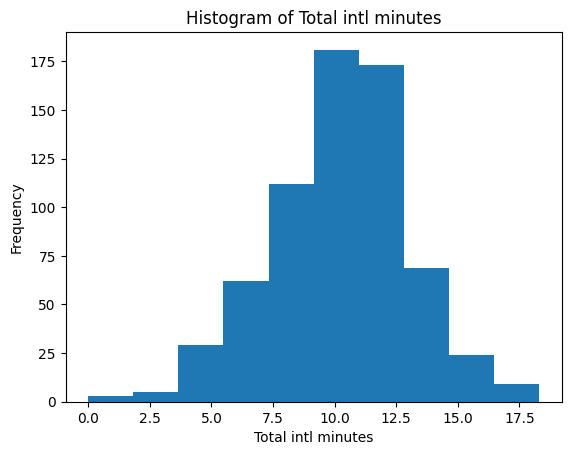

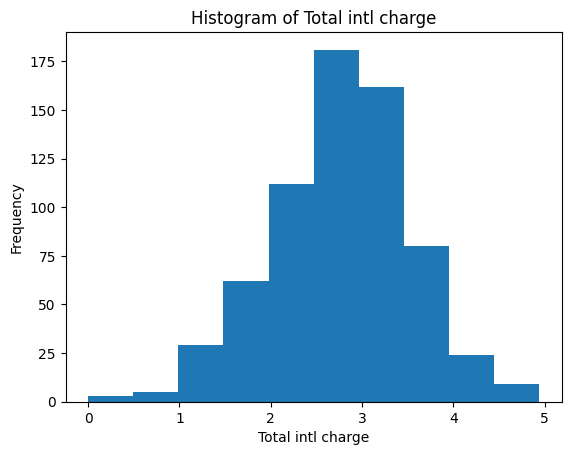

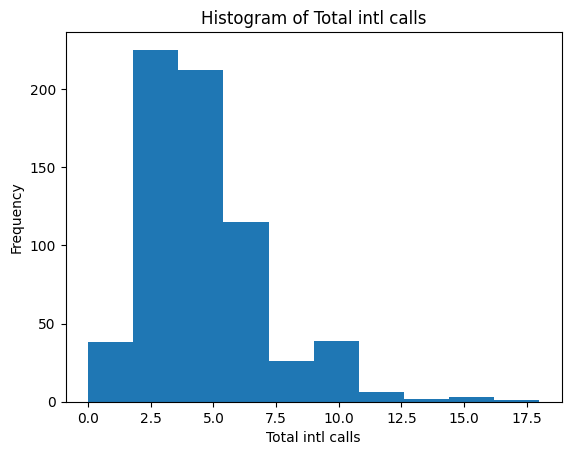

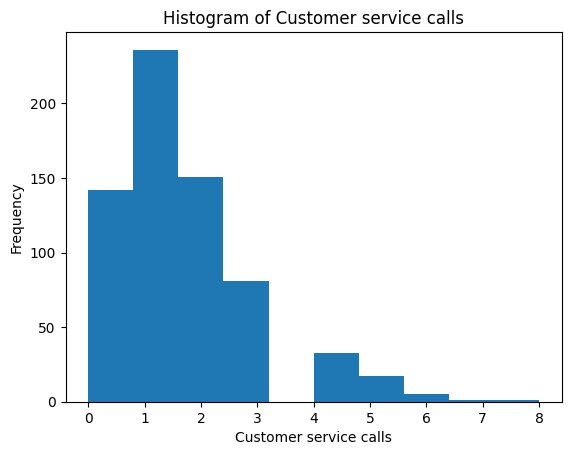

In [10]:
numeric_features = ['Number vmail messages', 'Total day minutes', 'Total day charge', 'Total day calls', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total intl minutes','Total intl charge', 'Total intl calls', 'Customer service calls']

for feature in numeric_features:
    plt.hist(df[feature], bins=10)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

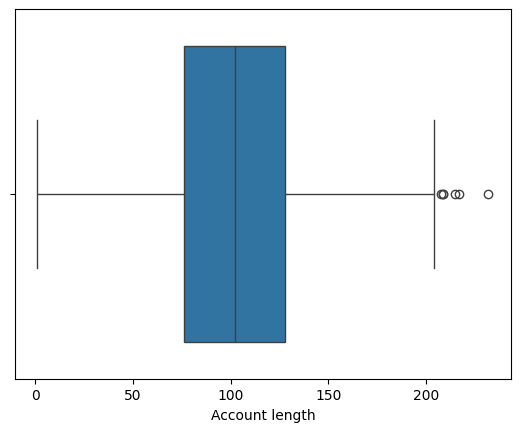

In [11]:
ax = sns.boxplot(data =df, x = 'Account length')

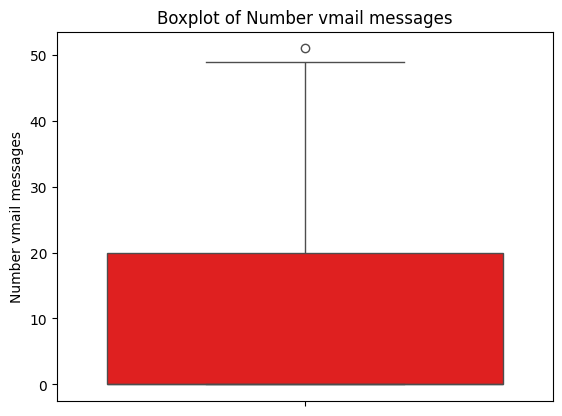

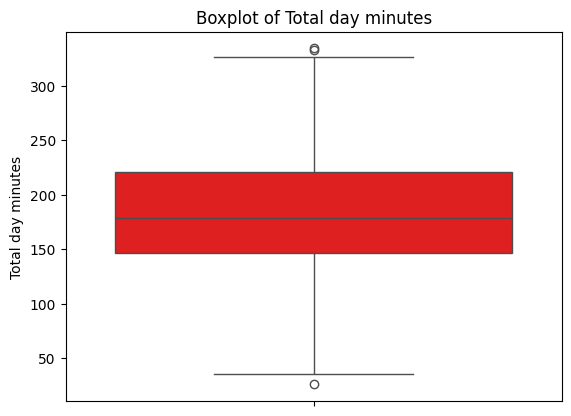

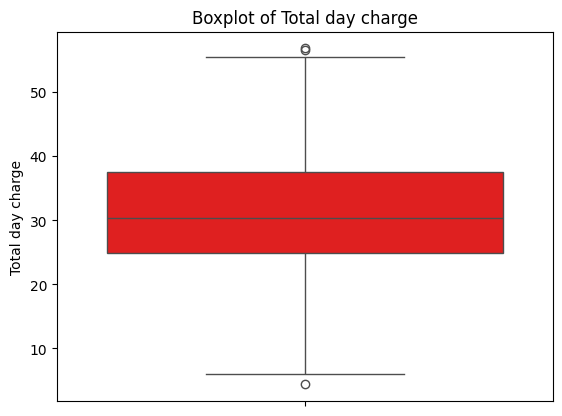

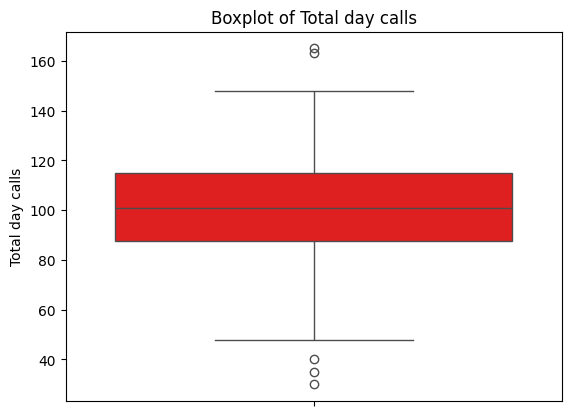

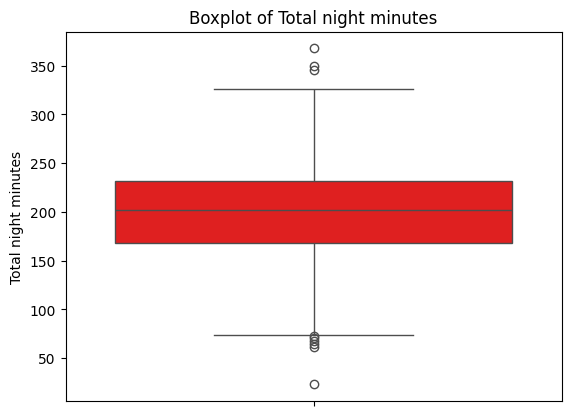

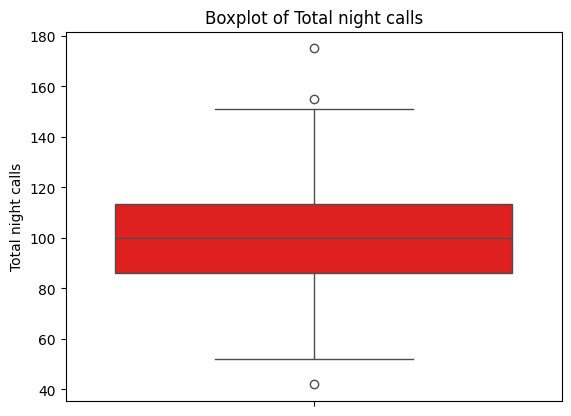

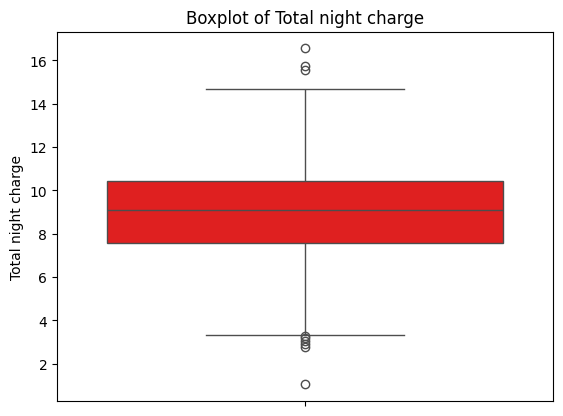

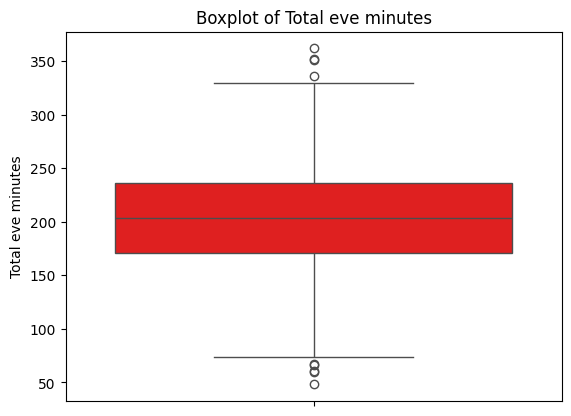

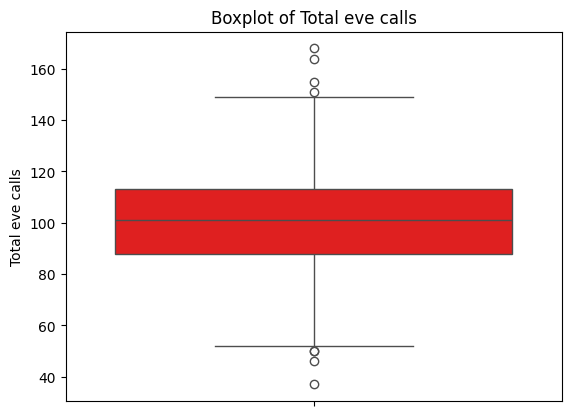

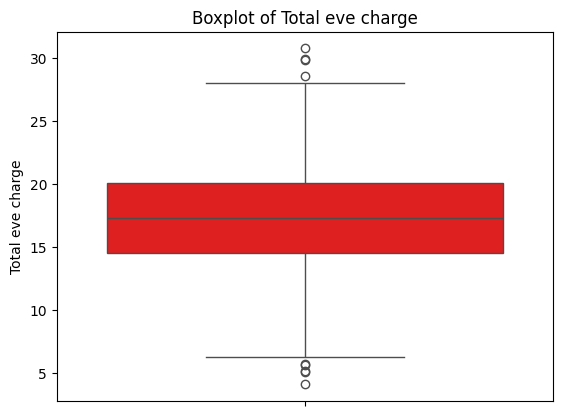

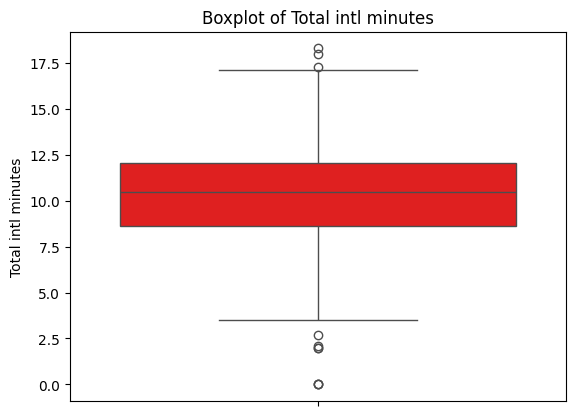

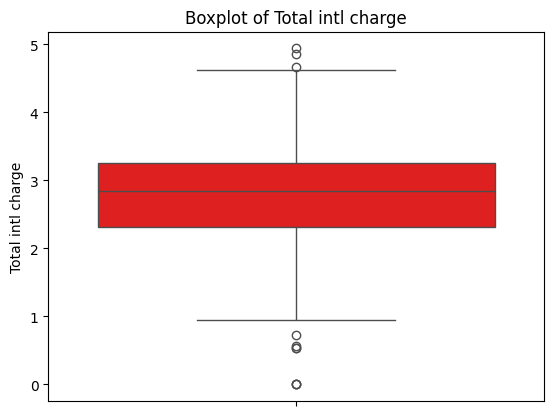

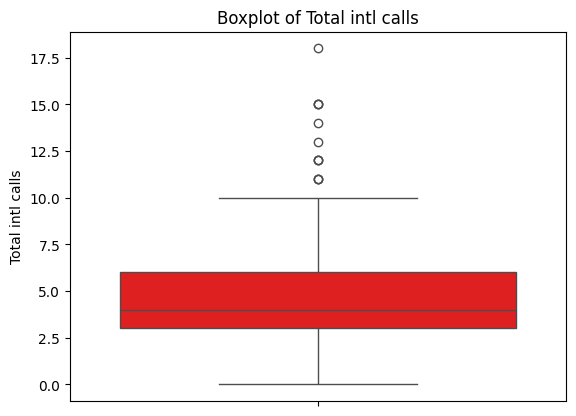

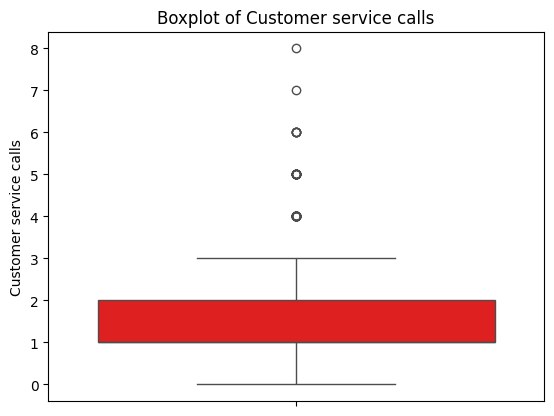

In [12]:
for feature in numeric_features:
    ax = sns.boxplot(data=df[feature], color = 'red')
    ax.set_title('Boxplot of ' + feature)
    plt.show()

## Categorical Features

In [13]:
df['International plan'].value_counts()

International plan
No     614
Yes     53
Name: count, dtype: int64

In [14]:
df['Voice mail plan'].value_counts()

Voice mail plan
No     478
Yes    189
Name: count, dtype: int64

In [15]:
df['State'].value_counts()

State
AZ    19
ND    18
WV    18
NJ    18
KS    18
NM    18
WA    18
RI    17
ID    17
MS    17
WI    17
TX    17
IN    17
LA    16
NE    16
OR    16
KY    16
VT    16
NY    15
MI    15
MT    15
CT    15
AL    14
MN    14
MA    13
IL    13
ME    13
NH    13
TN    12
UT    12
NC    12
MO    12
OH    12
SD    11
WY    11
SC    11
CA    10
DE    10
VA    10
MD    10
FL     9
AK     9
DC     9
HI     9
PA     9
OK     9
AR     8
CO     7
IA     6
NV     5
GA     5
Name: count, dtype: int64

In [16]:
df['Account length'].unique()

array([117,  65, 161, 111,  49,  36, 119,  10,  68,  74,  85,  46, 128,
       155,  73,  77, 108,  95, 141,  63,  97,  75, 127, 121,   6,  32,
        64,  25,  93, 208, 122,  99,  45, 139, 215,  94,  86, 106,  92,
        78,  83, 144, 143,  81, 145,  89, 199,  96, 124, 148, 135,  87,
        54,  35,  84, 112, 129, 140,  70,  79,  91, 149,  60, 115, 102,
        55, 126,  52,  67, 165, 150,  26,  69, 157,  80,  44, 101,  82,
        39,  30, 105, 166, 172,  88, 153, 109,  27,   3,  43, 116, 107,
       123, 110, 176,  13, 156, 158, 103, 151,  90,  33, 167,  38, 100,
       136, 120, 104,   1,  76, 132, 114,  48,  59,  50,  12, 131, 217,
       134,  53,  72,  98, 118, 130, 159,  37,  29, 113, 163,  56,  51,
        66, 193,   7,  71,  31, 190, 170, 125, 232, 182, 197,  57, 137,
        21, 191,  16,  34, 146, 138,  62, 201, 133, 162, 195, 177,  41,
        61, 152, 175, 160,  19, 142, 189, 169,  15, 180, 183,  58, 196,
       147, 164, 209, 171, 186, 178,  28, 185, 204, 184])

Text(0.5, 1.0, 'Area Code')

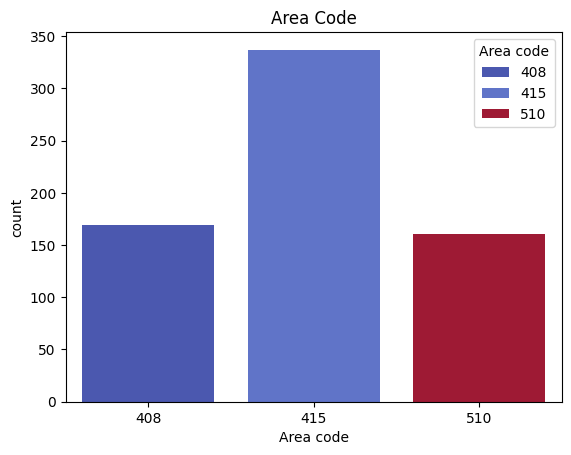

In [17]:
ax = sns.countplot(data = df, x = 'Area code', hue = 'Area code', palette = 'coolwarm')
ax.set_title('Area Code')

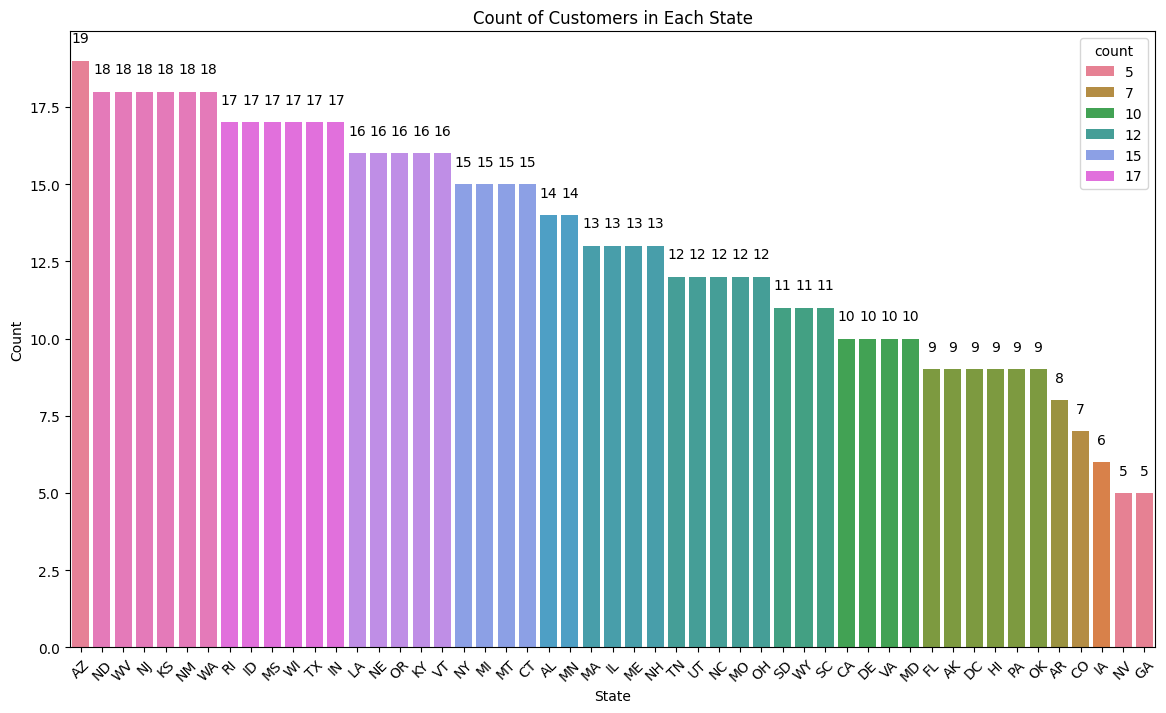

In [18]:
counts = df['State'].value_counts()

plt.figure(figsize=(14, 8))
sns.barplot(x=counts.index, y=counts, hue =counts, palette = 'husl')
plt.title('Count of Customers in Each State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding counts on top of each bar
for i, count in enumerate(df['State'].value_counts()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.show()

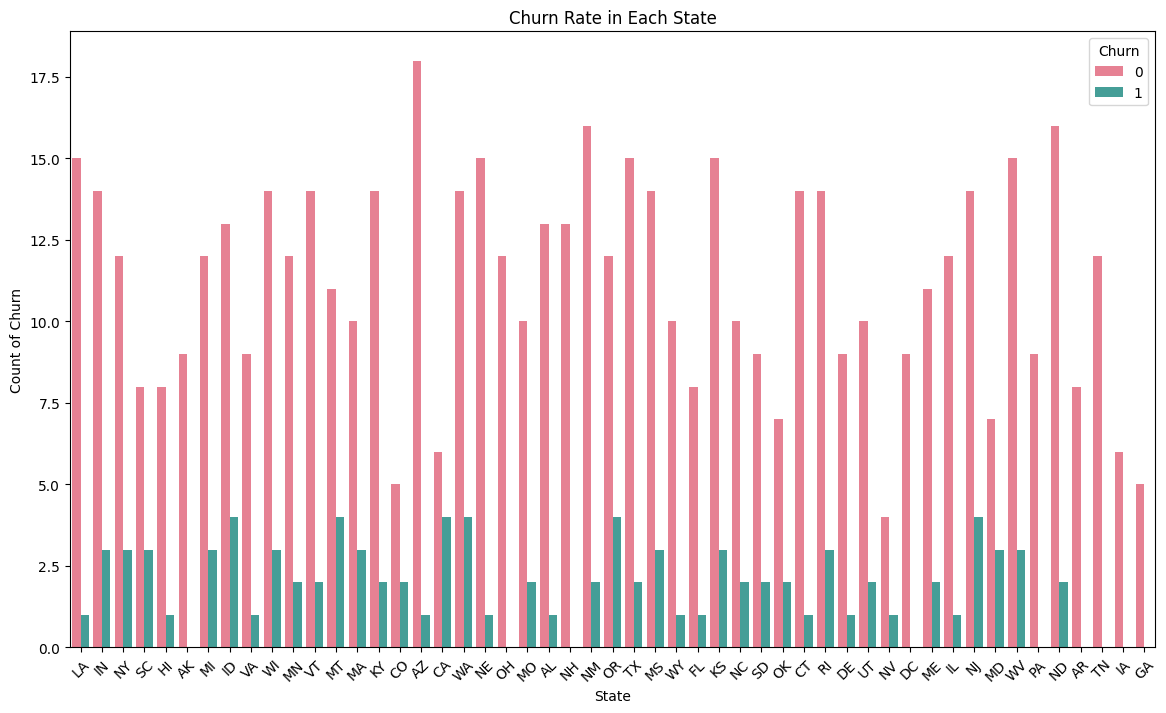

In [19]:

plt.figure(figsize=(14, 8))

# Plotting churn count for each state
sns.barplot(data=df, x='State', y='Churn', hue='Churn', estimator=lambda x: len(x), palette='husl')

plt.title('Churn Rate in Each State')
plt.xlabel('State')
plt.ylabel('Count of Churn')
plt.xticks(rotation=45)

plt.show()


In [20]:
# Dictionary mapping time zones to states
time_zone_states = {
    'Eastern': ['CT', 'DE', 'FL', 'GA', 'IN', 'KY', 'MA', 'MD', 'ME', 'MI', 'NC', 'NH', 'NJ', 'NY', 'OH', 'PA', 'RI', 'SC', 'VA', 'VT', 'WV', 'DC'],
    'Central': ['AL', 'AR', 'IL', 'IA', 'KS', 'LA', 'MN', 'MS', 'MO', 'NE', 'ND', 'OK', 'SD', 'TN', 'TX', 'WI'],
    'Mountain': ['AZ', 'CO', 'ID', 'MT', 'NM', 'UT', 'WY'],
    'Pacific': ['CA', 'NV', 'OR', 'WA'],
    'Hawaiian-Aleutian' : ['HI', 'AK']
}

# Function to assign time zone to each state
def get_time_zone(state):
    for zone, states in time_zone_states.items():
        if state in states:
            return zone
    return None

# List of states including DC
all_states = time_zone_states['Eastern'] + time_zone_states['Central'] + time_zone_states['Mountain'] + time_zone_states['Pacific'] + time_zone_states['Hawaiian-Aleutian']

# Add region column
df['region'] = df['State'].apply(get_time_zone)

df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,region
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,0,Central
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,19.42,208.8,111,9.40,12.7,6,3.43,4,1,Eastern
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,27.01,160.6,128,7.23,5.4,9,1.46,4,1,Eastern
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,11.67,189.6,105,8.53,7.7,6,2.08,2,0,Eastern
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,18.28,178.7,90,8.04,11.1,1,3.00,1,0,Hawaiian-Aleutian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,...,13.23,247.6,94,11.14,11.5,7,3.11,2,0,Central
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,...,17.33,229.5,73,10.33,8.1,3,2.19,1,0,Central
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,...,7.23,210.1,134,9.45,13.2,8,3.56,3,0,Eastern
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,...,16.80,193.7,82,8.72,11.6,4,3.13,1,0,Eastern


In [21]:
df.drop('State', axis=1, inplace=True)
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,region
0,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,Central
1,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1,Eastern
2,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1,Eastern
3,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0,Eastern
4,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0,Hawaiian-Aleutian


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          667 non-null    int64  
 1   Area code               667 non-null    int64  
 2   International plan      667 non-null    object 
 3   Voice mail plan         667 non-null    object 
 4   Number vmail messages   667 non-null    int64  
 5   Total day minutes       667 non-null    float64
 6   Total day calls         667 non-null    int64  
 7   Total day charge        667 non-null    float64
 8   Total eve minutes       667 non-null    float64
 9   Total eve calls         667 non-null    int64  
 10  Total eve charge        667 non-null    float64
 11  Total night minutes     667 non-null    float64
 12  Total night calls       667 non-null    int64  
 13  Total night charge      667 non-null    float64
 14  Total intl minutes      667 non-null    fl

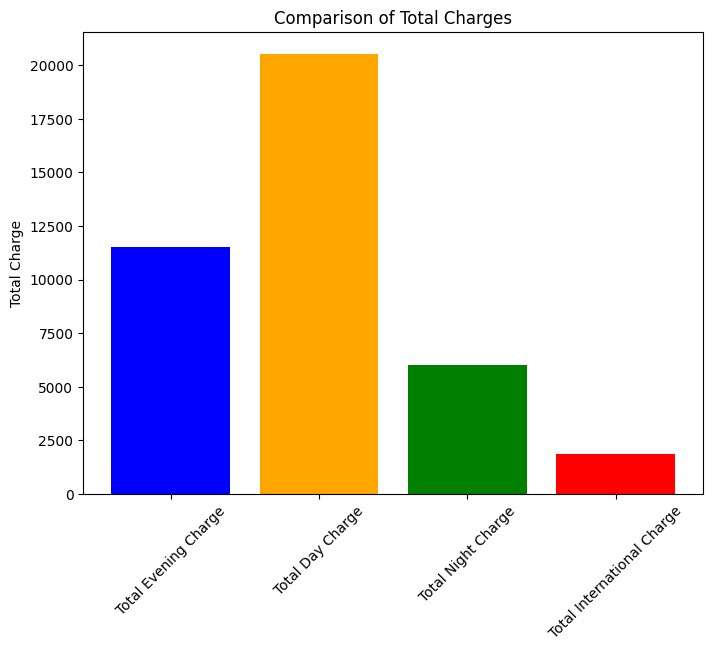

In [23]:
# Calculate charges
total_evening_charge = df['Total eve charge'].sum()
total_day_charge = df['Total day charge'].sum()
total_night_charge = df['Total night charge'].sum()
total_intl_charge = df['Total intl charge'].sum()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Total Evening Charge', 'Total Day Charge', 'Total Night Charge', 'Total International Charge'], [total_evening_charge, total_day_charge, total_night_charge, total_intl_charge], color=['blue', 'orange', 'green', 'red'])
plt.title('Comparison of Total Charges')
plt.ylabel('Total Charge')
plt.xticks(rotation=45)
plt.show()

## Bivariate Analysis

Text(0.5, 1.0, 'Total Minutes in a Day over Charge')

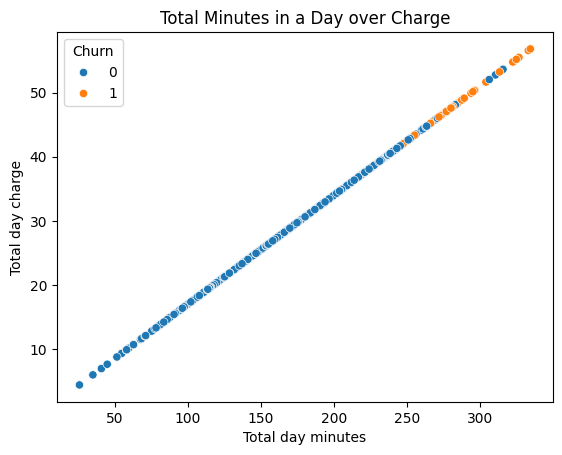

In [24]:
ax = sns.scatterplot(data =df, x = 'Total day minutes', y = 'Total day charge', hue = 'Churn')
ax.set_title('Total Minutes in a Day over Charge')

The charges for more minutes, the more likely a customer will churn.

Text(0.5, 1.0, 'Total Calls in a Day over Charge')

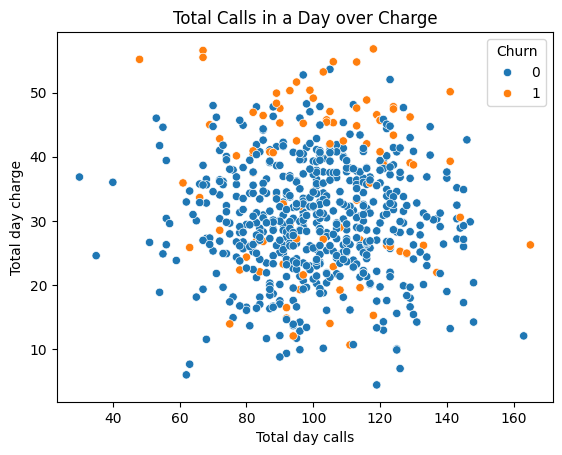

In [25]:
ax = sns.scatterplot(data =df, x = 'Total day calls', y = 'Total day charge', hue = 'Churn')
ax.set_title('Total Calls in a Day over Charge')

Text(0.5, 1.0, 'Total Minutes in the Eve over Charge')

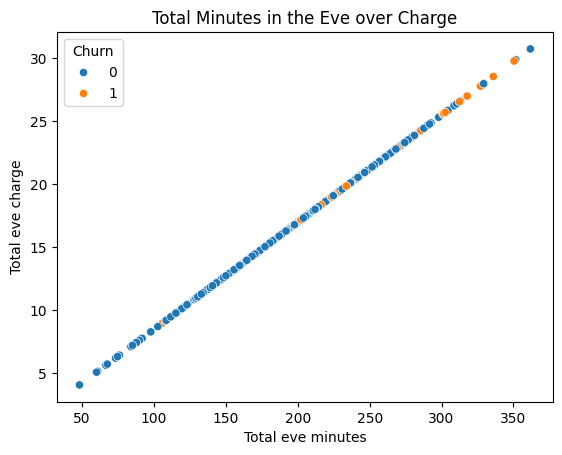

In [26]:
ax = sns.scatterplot(data =df, x = 'Total eve minutes', y = 'Total eve charge', hue = 'Churn')
ax.set_title('Total Minutes in the Eve over Charge')

Text(0.5, 1.0, 'Total Calls in the Eve over Charge')

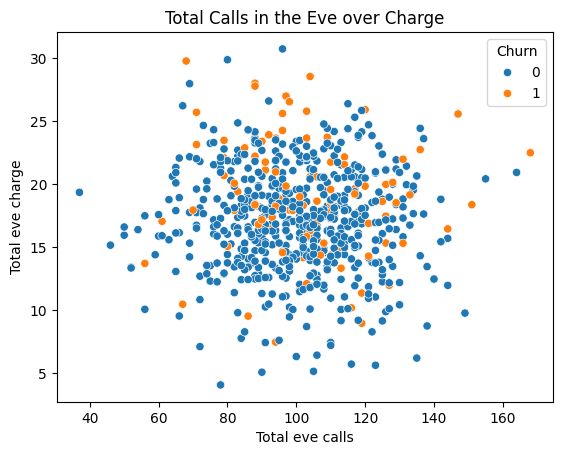

In [27]:
ax = sns.scatterplot(data =df, x = 'Total eve calls', y = 'Total eve charge', hue = 'Churn')
ax.set_title('Total Calls in the Eve over Charge')

Text(0.5, 1.0, 'Total Calls in the Night over Charge')

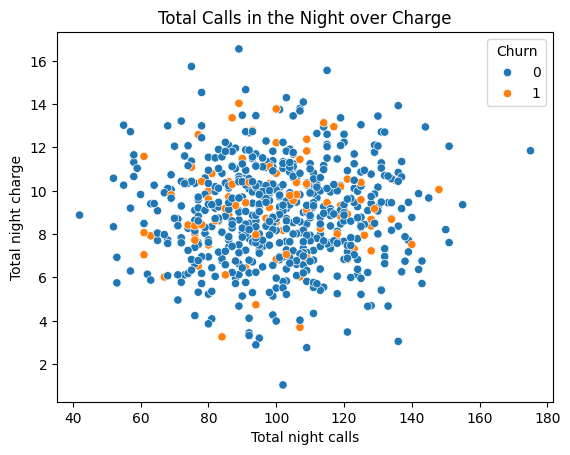

In [28]:
ax = sns.scatterplot(data =df, x = 'Total night calls', y = 'Total night charge', hue = 'Churn')
ax.set_title('Total Calls in the Night over Charge')

Text(0.5, 1.0, 'Total Minutes in the Night over Charge')

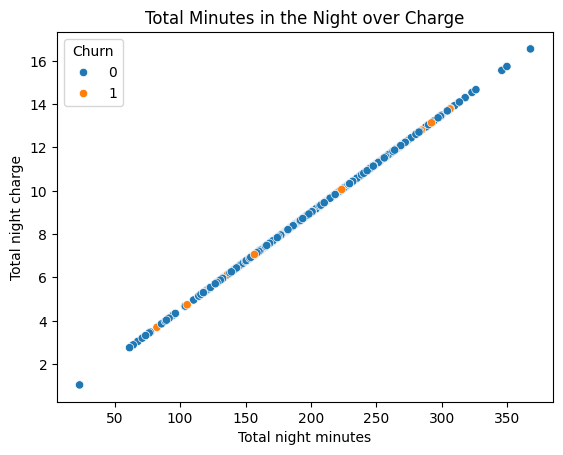

In [29]:
ax = sns.scatterplot(data =df, x = 'Total night minutes', y = 'Total night charge', hue = 'Churn')
ax.set_title('Total Minutes in the Night over Charge')

Text(0.5, 1.0, 'Total Minutes Internationally over Charge')

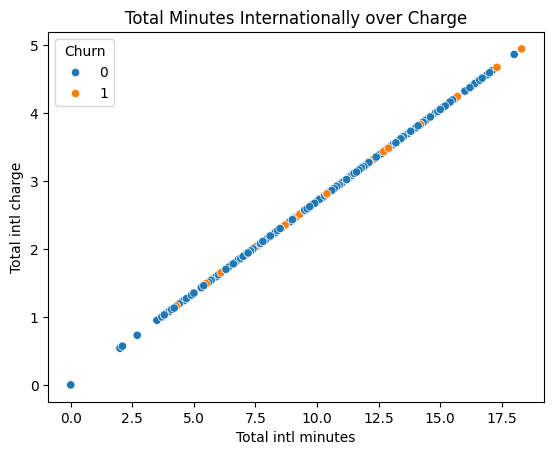

In [30]:
ax = sns.scatterplot(data =df, x = 'Total intl minutes', y = 'Total intl charge', hue = 'Churn')
ax.set_title('Total Minutes Internationally over Charge')

Text(0.5, 1.0, 'Total Calls Internationally over Charge')

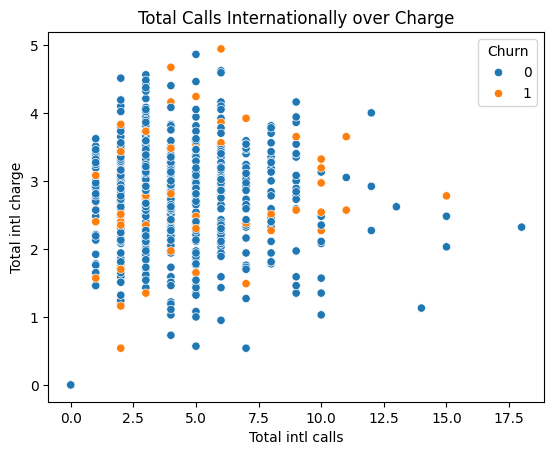

In [31]:
ax = sns.scatterplot(data =df, x = 'Total intl calls', y = 'Total intl charge', hue = 'Churn')
ax.set_title('Total Calls Internationally over Charge')

## Correlation Analysis

Text(0.5, 1.0, 'Correlation Matrix for Minutes')

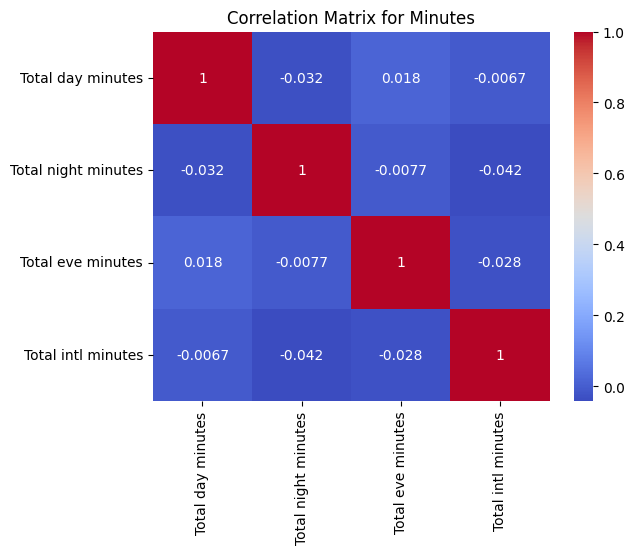

In [32]:
num_var = df[['Total day minutes', 'Total night minutes', 'Total eve minutes', 'Total intl minutes']]

corr_matrix = num_var.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Minutes')

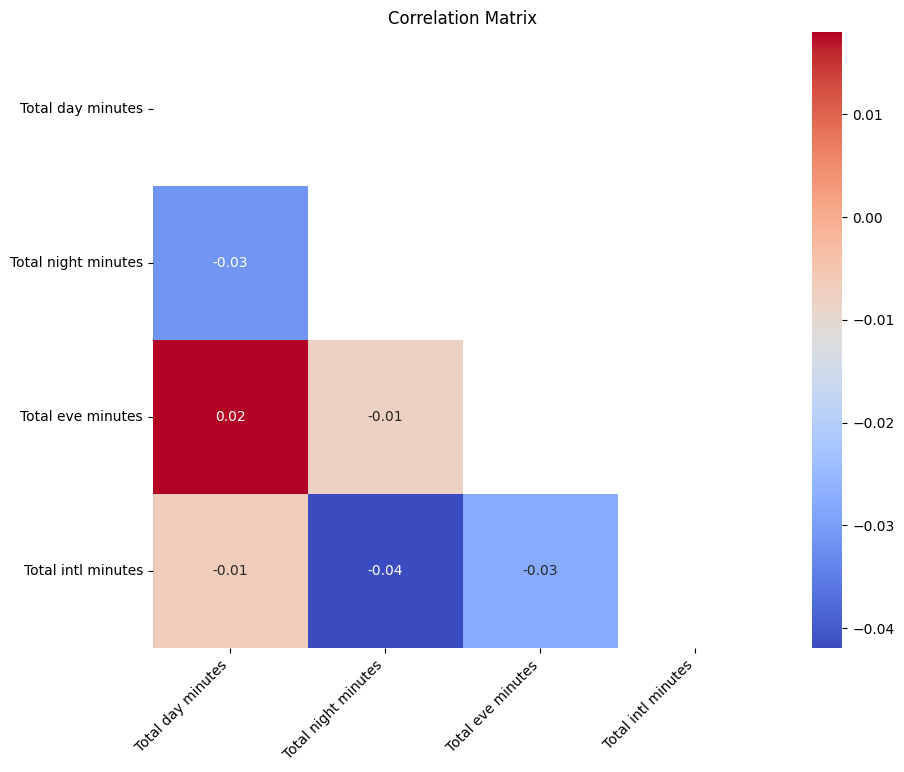

In [33]:
# Creating a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Setting up the matplotlib figure
plt.figure(figsize=(10, 8))
# Drawing the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
# Adjusting layout for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [35]:
df[['International plan', 'Voice mail plan']] = df[['International plan', 'Voice mail plan']].replace(['Yes', 'No'], [1, 0] )
df['Churn'].replace(['True', 'False'], [1,0], inplace = True)

In [36]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,region
0,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,Central
1,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1,Eastern
2,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1,Eastern
3,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0,Eastern
4,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0,Hawaiian-Aleutian


## Split train test

In [37]:
# Create dummy variables for categorical variables with integer dtype
df = pd.get_dummies(df, columns=['International plan', 'Voice mail plan', 'region'], drop_first=True, dtype=int)

X = df.drop('Churn', axis = 1)
y = df['Churn']

In [38]:
# Split the data into train and test partitions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 466 samples
Testing set size: 201 samples


In [39]:
from sklearn.preprocessing import MinMaxScaler
# Scale the numerical features
scaler = MinMaxScaler() # Or you can use StandardScaler() for standardization
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train = sm.add_constant(X_train)
# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Logistic Regression Assumptions:

In [47]:
# Fit the logistic regression model
model = sm.Logit(y, sm.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.299854
         Iterations 8


In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                  667
Model:                          Logit   Df Residuals:                      644
Method:                           MLE   Df Model:                           22
Date:                Thu, 25 Apr 2024   Pseudo R-squ.:                  0.2675
Time:                        18:35:26   Log-Likelihood:                -200.00
converged:                       True   LL-Null:                       -273.04
Covariance Type:            nonrobust   LLR p-value:                 2.635e-20
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -12.1494      2.207     -5.504      0.000     -16.476      -7.823
Account length               0.0011      0.003      0.356      0.722      -0.005       0.007
Area code                   -0.0005      0.003     -0.161      0.872      -0.007       0.006
Number vmail messages        0.0180      0.039      0.462      0.644      -0.058       0.094
Total day minutes           -2.1856      7.544     -0.290      0.772     -16.971      12.599
Total day calls              0.0040      0.006      0.620      0.535      -0.009       0.017
Total day charge            12.9428     44.374      0.292      0.771     -74.029      99.914
Total eve minutes           -2.8817      3.824     -0.754      0.451     -10.376       4.613
Total eve calls              0.0110      0.007      1.593      0.111      -0.003       0.024
Total eve charge            34.0750     44.988      0.757      0.449     -54.100     122.250
Total night minutes          0.2641      2.047      0.129      0.897      -3.748       4.276
Total night calls           -0.0063      0.007     -0.913      0.361      -0.020       0.007
Total night charge          -5.6971     45.488     -0.125      0.900     -94.851      83.457
Total intl minutes          -7.5523     12.616     -0.599      0.549     -32.279      17.175
Total intl calls             0.0138      0.055      0.252      0.801      -0.093       0.121
Total intl charge           28.1765     46.720      0.603      0.546     -63.394     119.747
Customer service calls       0.5750      0.092      6.254      0.000       0.395       0.755
International plan_1         1.9419      0.380      5.108      0.000       1.197       2.687
Voice mail plan_1           -1.6524      1.249     -1.323      0.186      -4.101       0.796
region_Eastern               0.2036      0.319      0.638      0.524      -0.422       0.829
region_Hawaiian-Aleutian    -0.4259      1.169     -0.364      0.716      -2.716       1.865
region_Mountain              0.4893      0.407      1.201      0.230      -0.309       1.288
region_Pacific               1.0627      0.461      2.307      0.021       0.160       1.965
============================================================================================
"""

When the p-value < 0.05:

- Customer Service calls
- International Plan
- region_Pacific

In [48]:
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

In [49]:
# Binary Outcome:
df['Churn']

0      0
1      1
2      1
3      0
4      0
      ..
662    0
663    0
664    0
665    0
666    0
Name: Churn, Length: 667, dtype: int64

Meets the binary outcome assumption.

In [50]:
predicted_probs = model.predict()

Because the errors are random alongside the y = 0, it shows that there are no visual patterns or trend. This means that the assumption is met because the errors are independent of each other.

It might also be significant to consider the significance of the outliers. They could indicate that they are influential to the model. This will prevent the assumption from being met until the model is refined.

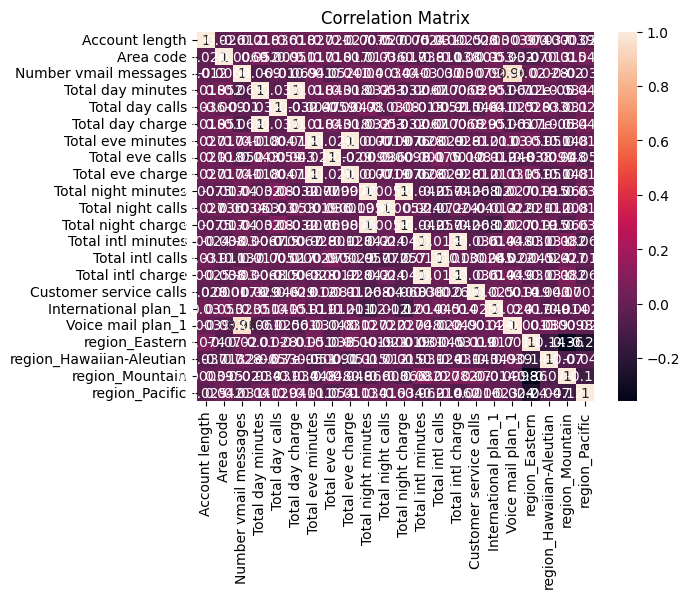

In [53]:
# No Multicollinearity:
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix')
plt.show()

In [55]:
# Large Sample Size
print(('Number of Observations:', len(y)))
print('Number of Predictor Variables:', X.shape[1])

('Number of Observations:', 667)
Number of Predictor Variables: 22


# **Executive Summary: Exploratory Data Analysis of Customer Churn Dataset**
**Introduction**:

This report presents results of an EDA conducted on a dataset containing information on customer churn for a major cell phone company. The analysis aims to uncover key insights and patterns in the data to help understand factors influencing customer churn and inform business decisions.

**Data Overview:**

The dataset consists of 667 observations and 20 variables. Variables include the total number of minutes, charges, and calls for each day, eve, night, and international. As well as, information about the customer's location (State), area code, how many customer service calls made, the number of voicemails, and if they have an international or voicemail plan (Y/N). The dependent variable is if the customer churns (Y/N). There are no missing values in the dataset, but in order to test the significance of the customer's state, we had to group the states together by time-zone regions.

**Key Findings:**

The overall churn rate is 14%, indicating a significant portion of customer churn. The higher charges for additional minutes during the day, the greater the likelihood of a customer churning.

**Feature Engineering:**

Add the total charges, minutes, and calls to analyze how that can significantly impact or drive the customer churn rate.

**Modeling Approach:**

Conducted Linear and Logistic Regression models to prdict customer churn. As well as evaluated model assumptions.

**Conclusion:**

Customer churn is influenced by customer service calls and international plans.

-Recommendations: Create a decision tree and test that model. Or ensemble methods. Tune hyperparameters. Remove insignificant variables to test models performance.

-Further analysis: Area code and state instead of using the time-zone for the states to split up. Analyze how area code and state region can change or influence customer churn.

In [58]:
df.to_csv('churn.csv', index=False)